In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from metrics import MAPE

from utils import resampling, split_data
from visualization import sample_to_scaleogram
from preprocess import make_cwt_data, make_target_data
import numpy as np
from model import create_model
from trainer import Trainer
from dataset import Dataset
from config import TrainConfig, DatasetConfig
# from preprocess import *

# 그래프 시각화 옵션 
%matplotlib inline

# 그래프의 한글 폰트를 설정 
mpl.rc('font', family = "NanumBarunGothic") #맑은 고딕 설정 

#그래프의 한글을 더욱 선명하게 출력 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

#그래프에서 음수값이 나올때, 깨지는 현상 방지 
mpl.rc('axes', unicode_minus = False)

/Users/dhkim/.pyenv/versions/anaconda3-5.3.1/envs/torch/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/dhkim/.pyenv/versions/anaconda3-5.3.1/envs/torch/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/dhkim/.pyenv/versions/anaconda3-5.3.1/envs/torch/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 

In [2]:
data_config = DatasetConfig()

In [3]:
dataset = Dataset(data_config)

In [4]:
dataset.preprocess()

100%|██████████| 128/128 [00:02<00:00, 52.47it/s]


In [5]:
dataset.train.shape, dataset.valid.shape, dataset.test.shape

((1026, 1505), (129, 1505), (128, 1505))

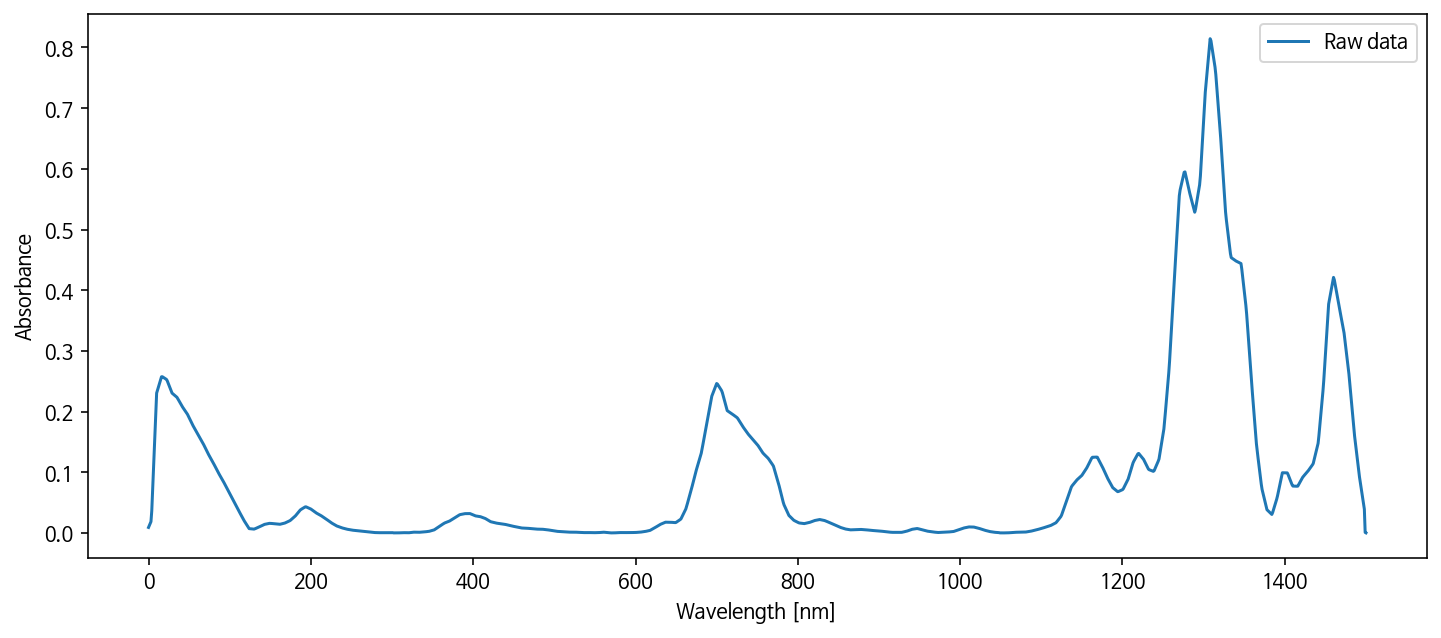

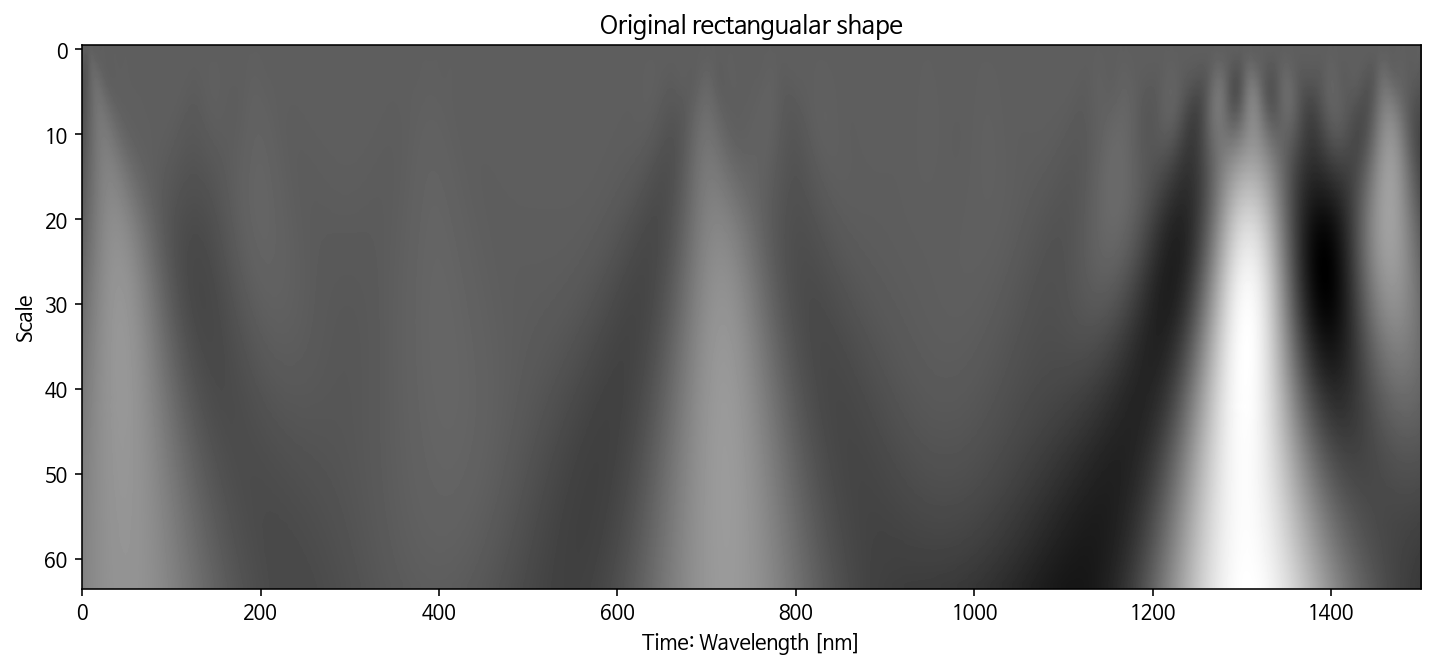

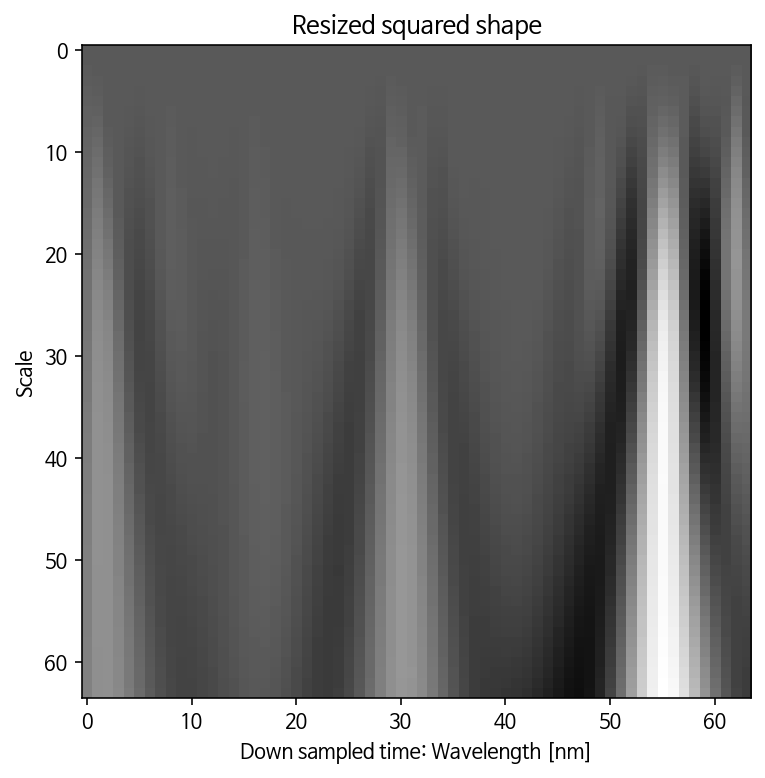

In [6]:
sample_to_scaleogram(dataset.df, signal_length=64, wavelet='mexh')

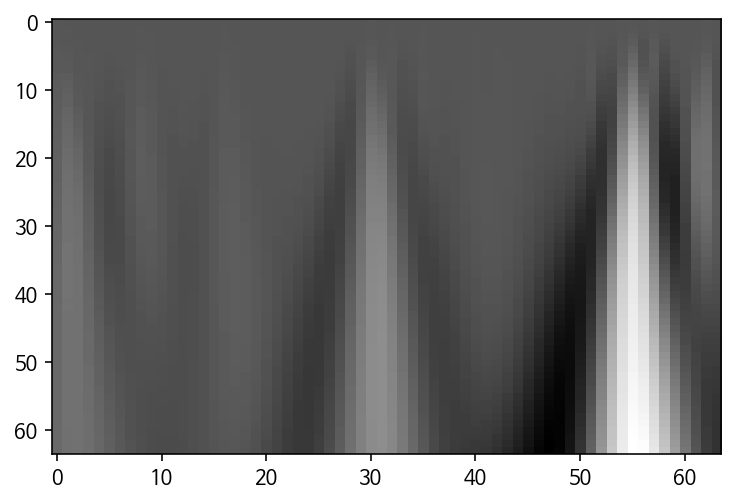

In [7]:
plt.imshow(dataset.train_X[0], cmap = 'gray', aspect = 'auto')

In [8]:
train_config = TrainConfig()

In [9]:
model = create_model(dataset.train_X)

In [10]:
trainer = Trainer(dataset=dataset, model=model, config=train_config)

Epoch 1/500
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
16/17 [===========================>..] - ETA: 0s - loss: 0.7045 - mae: 0.7045WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f82aabfc400> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=1

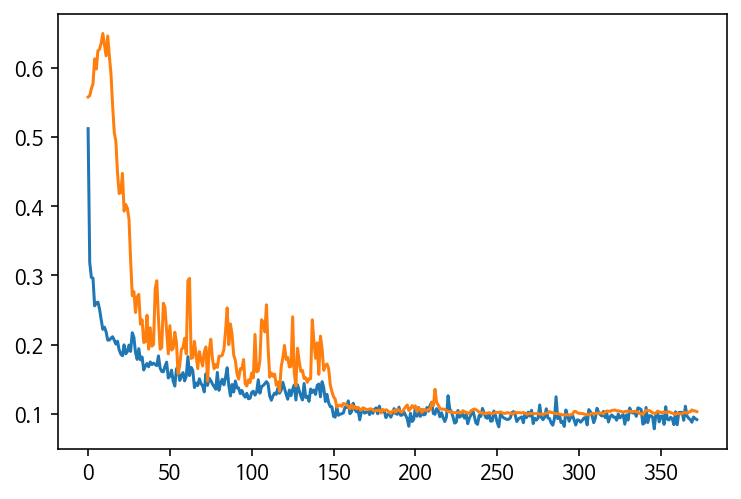

In [11]:
trainer.train()

In [ ]:
model.load_weights('weights/best_all.h5')
pred_test_1=np.expm1(scaler.inverse_transform(model.predict(test_scalo_df_1,batch_size=BATCH_SIZE ,verbose=1)))
y1_ans_1=np.expm1(scaler.inverse_transform(log_Y_test_scaled))

y1_pred_f1=pd.DataFrame(pred_test_1).iloc[:,0]
y1_ans_f1=pd.DataFrame(y1_ans_1).iloc[:,0]

plt.figure(figsize=(10, 10))
plt.title('F1')
plt.scatter(y1_ans_f1.index, y1_ans_f1, label='target')
plt.scatter(y1_pred_f1.index, y1_pred_f1, label='pred')
plt.legend()
plt.show()

print(f"R2 Score : {r2_score(y1_ans_f1, y1_pred_f1)}")
print(f"RMSE Score : {np.sqrt(mean_squared_error(y1_ans_f1, y1_pred_f1))}")
print(f"MAE Score : {mean_absolute_error(y1_ans_f1, y1_pred_f1)}")
print(f"MAPE Score : {MAPE(y1_ans_f1, y1_pred_f1)/100}")

y1_pred_f2=pd.DataFrame(pred_test_1).iloc[:,1]
y1_ans_f2=pd.DataFrame(y1_ans_1).iloc[:,1]

plt.figure(figsize=(10, 10))
plt.title('F2')
plt.scatter(y1_ans_f2.index, y1_ans_f2, label='target')
plt.scatter(y1_pred_f2.index, y1_pred_f2, label='pred')
plt.legend()
plt.show()

print(f"R2 Score : {r2_score(y1_ans_f2, y1_pred_f2)}")
print(f"RMSE Score : {np.sqrt(mean_squared_error(y1_ans_f2, y1_pred_f2))}")
print(f"MAE Score : {mean_absolute_error(y1_ans_f2, y1_pred_f2)}")
print(f"MAPE Score : {MAPE(y1_ans_f2, y1_pred_f2)/100}")

y1_pred_f3=pd.DataFrame(pred_test_1).iloc[:,2]
y1_ans_f3=pd.DataFrame(y1_ans_1).iloc[:,2]

plt.figure(figsize=(10, 10))
plt.title('F3')
plt.scatter(y1_ans_f3.index, y1_ans_f3, label='target')
plt.scatter(y1_pred_f3.index, y1_pred_f3, label='pred')
plt.legend()
plt.show()

print(f"R2 Score : {r2_score(y1_ans_f3, y1_pred_f3)}")
print(f"RMSE Score : {np.sqrt(mean_squared_error(y1_ans_f3, y1_pred_f3))}")
print(f"MAE Score : {mean_absolute_error(y1_ans_f3, y1_pred_f3)}")
print(f"MAPE Score : {MAPE(y1_ans_f3, y1_pred_f3)/100}")

f, (ax0, ax1) = plt.subplots(1, 2, sharey=True, figsize=(12,5))

# Plot results
ax0.scatter(y1_ans_f1, y1_pred_f1)
ax0.plot([0, 70000], [0, 70000], "--k")
ax0.set_ylabel("Target predicted")
ax0.set_xlabel("True Target")
ax0.set_title("F1")
ax0.text(
    4500,
    70500,
    r"$R^2$=%.2f, MAE=%.2f, MAPE=%.4f"
    % (r2_score(y1_ans_f1, y1_pred_f1), mean_absolute_error(y1_ans_f1, y1_pred_f1)
       ,MAPE(y1_ans_f1, y1_pred_f1)/100),
)
ax0.set_xlim([0, 80000])
ax0.set_ylim([0, 80000])

################
ax1.scatter(y1_ans_f2, y1_pred_f2)
ax1.plot([0, 70000], [0, 70000], "--k")
ax1.set_ylabel("Target predicted")
ax1.set_xlabel("True Target")
ax1.set_title("F2")
ax1.text(
    4500,
    70500,
    r"$R^2$=%.2f, MAE=%.2f, MAPE=%.4f"
    % (r2_score(y1_ans_f2, y1_pred_f2), mean_absolute_error(y1_ans_f2, y1_pred_f2)
       ,MAPE(y1_ans_f2, y1_pred_f2)/100),
)
ax1.set_xlim([0, 80000])
ax1.set_ylim([0, 80000])

f.suptitle("Hydrocarbon Dataset", y=0.035)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

In [5]:
from config import TrainConfig

In [6]:
TrainConfig().BATCH_SIZE

64

In [1]:
from config import TempConfig

In [7]:
TempConfig.WEIGHT_PATH

'weights/best_all.h5'